In [6]:
import ccxt
import pandas as pd

# 初始化交易所
# 初始化 Binance 交易所，配置代理和顶级域名
exchange = ccxt.binance({
    'httpsProxy': 'http://127.0.0.1:7890',  # 设置代理
    'timeout': 30000,  # 请求超时时间（可选）
    'tld': 'us',  # Binance US 域名
})

In [9]:
# 定义获取历史数据的函数
def fetch_data(symbol, timeframe, start, end, limit=500):
    since = exchange.parse8601(start)  # 转换起始时间
    all_ohlcv = []

    while True:
        # 获取数据
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=since, limit=limit)

        if not ohlcv:
            break

        all_ohlcv.extend(ohlcv)

        # 更新 since 时间，获取下一个时间段的数据
        since = ohlcv[-1][0] + 1  # 使用最后一条数据的时间戳，避免重复

        # 输出获取的数据条数
        print(f"Fetched {len(ohlcv)} records, total: {len(all_ohlcv)}")

        # 如果返回的数据少于限制，说明已经到达末尾
        if len(ohlcv) < limit:
            break

    # 将数据转换为 DataFrame
    df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # 过滤数据到指定结束日期
    end_date = pd.to_datetime(end)
    df = df[df.index <= end_date]

    return df

In [10]:
# 获取 SOL/USDT 和 JUP/USDT 的数据
symbol1 = 'SOL/USDT'
symbol2 = 'JUP/USDT'
timeframe = '1h'  # 数据间隔
start = '2024-02-01 00:00:00'
end = '2024-09-30 23:59:59'

# 下载数据
data1 = fetch_data(symbol1, timeframe, start, end)
data2 = fetch_data(symbol2, timeframe, start, end)
print(data1)
# 保存为 CSV 文件
data1.to_csv('SOL_USDT_data.csv')
data2.to_csv('JUP_USDT_data.csv')


Fetched 500 records, total: 500
Fetched 500 records, total: 1000
Fetched 500 records, total: 1500
Fetched 500 records, total: 2000
Fetched 500 records, total: 2500
Fetched 500 records, total: 3000
Fetched 500 records, total: 3500
Fetched 500 records, total: 4000
Fetched 500 records, total: 4500
Fetched 500 records, total: 5000
Fetched 500 records, total: 5500
Fetched 500 records, total: 6000
Fetched 500 records, total: 6500
Fetched 500 records, total: 7000
Fetched 500 records, total: 7500
Fetched 500 records, total: 8000
Fetched 500 records, total: 8500
Fetched 52 records, total: 8552
Fetched 500 records, total: 500
Fetched 500 records, total: 1000
Fetched 500 records, total: 1500
Fetched 500 records, total: 2000
Fetched 500 records, total: 2500
Fetched 500 records, total: 3000
Fetched 500 records, total: 3500
Fetched 500 records, total: 4000
Fetched 500 records, total: 4500
Fetched 500 records, total: 5000
Fetched 500 records, total: 5500
Fetched 500 records, total: 6000
Fetched 500 r

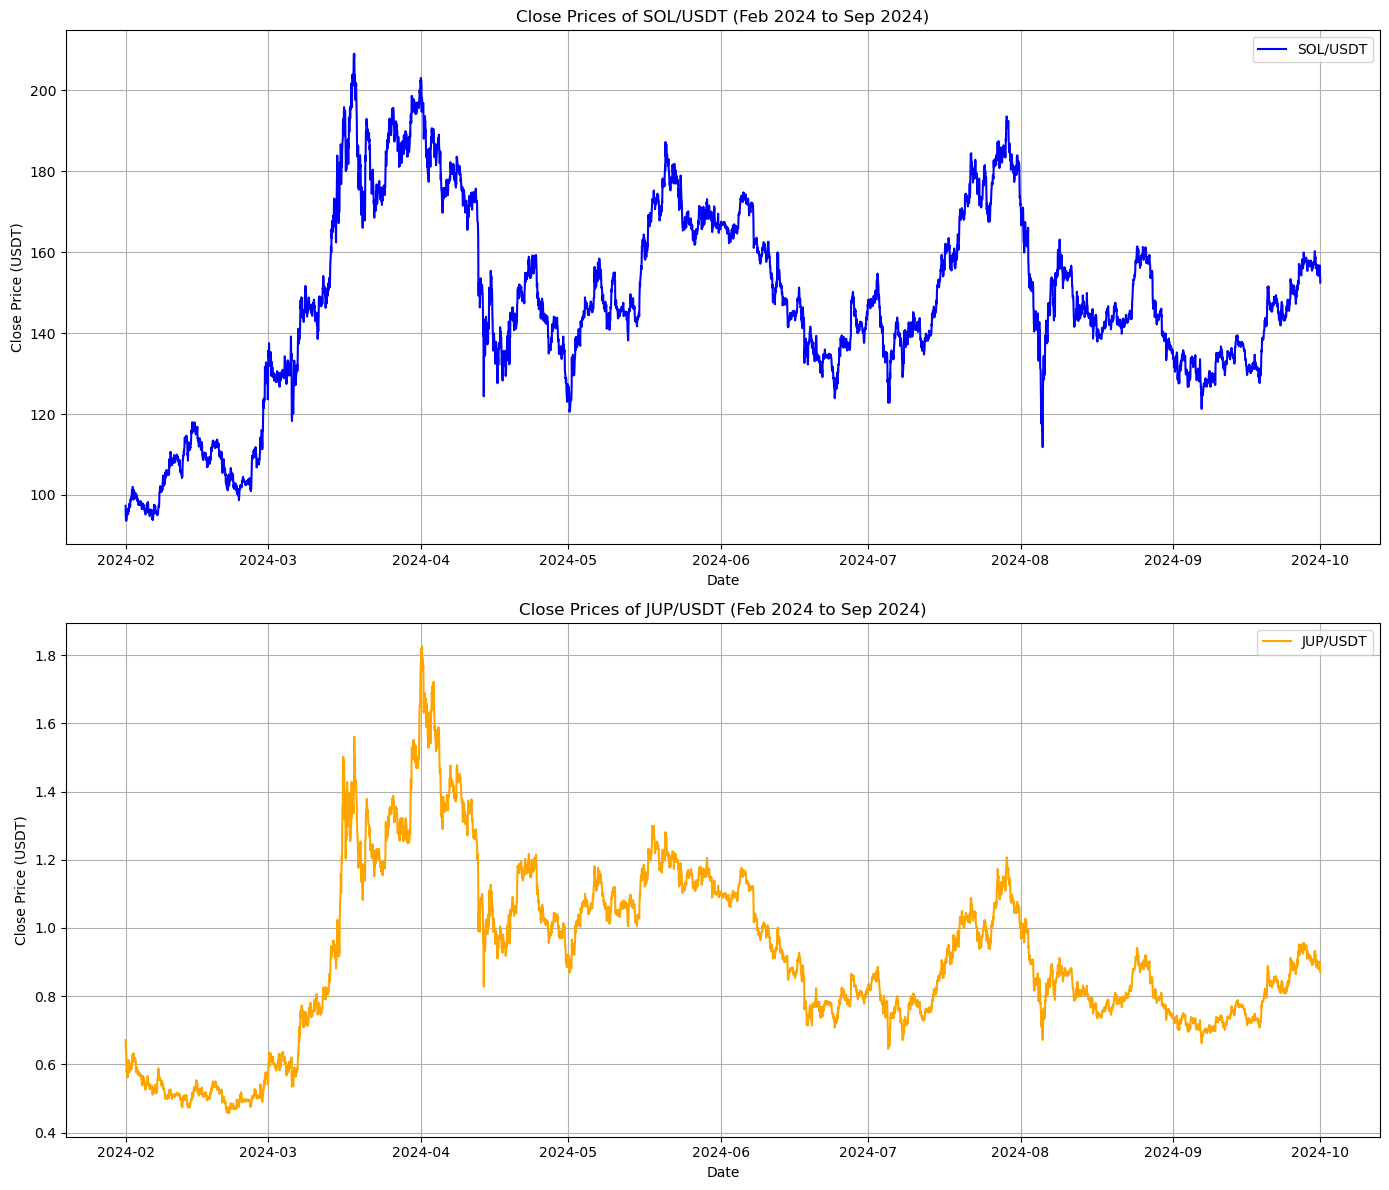

In [11]:
import matplotlib.pyplot as plt

# 创建两个子图
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 绘制第一个交易对的子图
axes[0].plot(data1['close'], label='SOL/USDT', color='blue')
axes[0].set_title('Close Prices of SOL/USDT (Feb 2024 to Sep 2024)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price (USDT)')
axes[0].legend()
axes[0].grid(True)

# 绘制第二个交易对的子图
axes[1].plot(data2['close'], label='JUP/USDT', color='orange')
axes[1].set_title('Close Prices of JUP/USDT (Feb 2024 to Sep 2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price (USDT)')
axes[1].legend()
axes[1].grid(True)

# 调整布局并显示图像
plt.tight_layout()
plt.show()

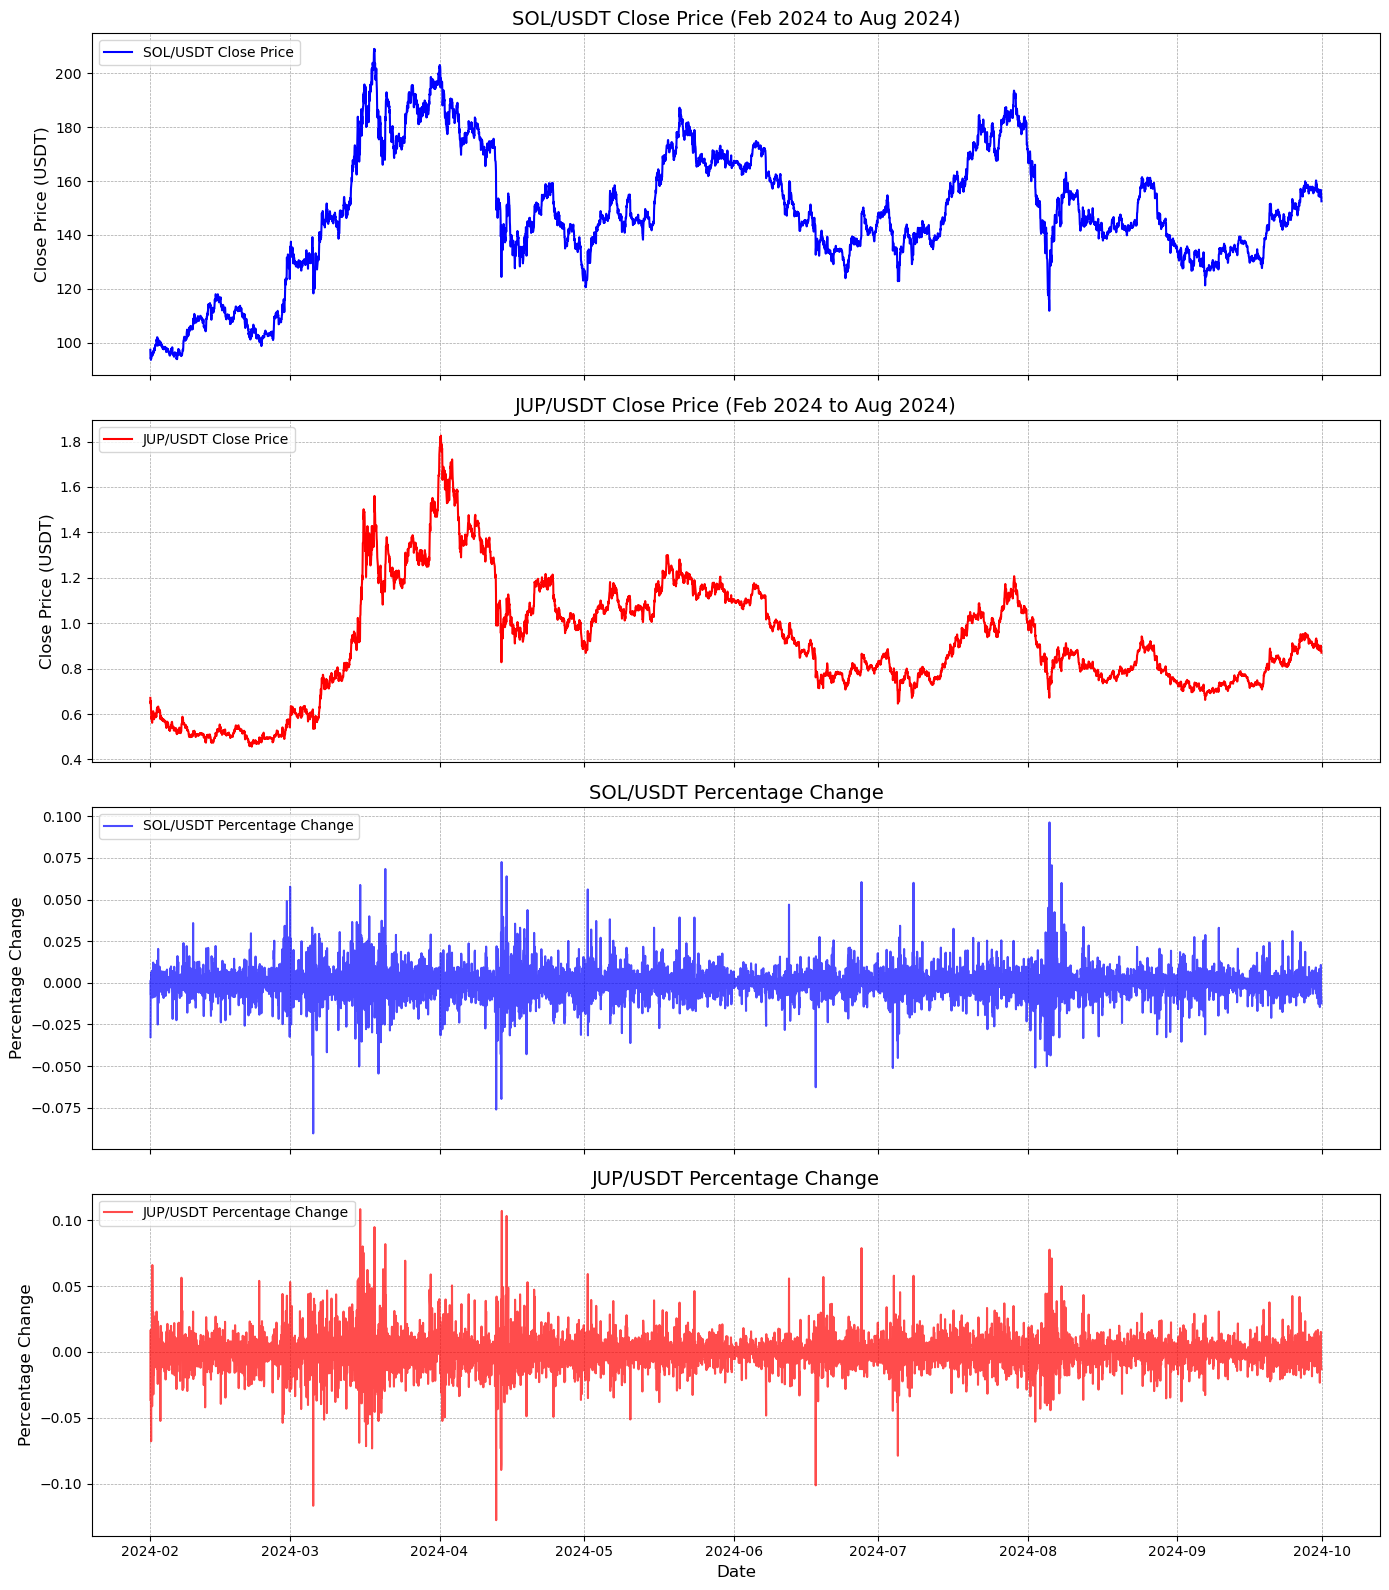

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 从 CSV 文件读取数据
data1 = pd.read_csv('SOL_USDT_data.csv', index_col='timestamp', parse_dates=True)
data2 = pd.read_csv('JUP_USDT_data.csv', index_col='timestamp', parse_dates=True)

# 计算百分比变化
data1['pct_change'] = data1['close'].pct_change()
data2['pct_change'] = data2['close'].pct_change()

# 创建四个子图
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# 绘制 SOL/USDT 的收盘价
axes[0].plot(data1.index, data1['close'], label='SOL/USDT Close Price', color='blue', linewidth=1.5)
axes[0].set_title('SOL/USDT Close Price (Feb 2024 to Aug 2024)', fontsize=14)
axes[0].set_ylabel('Close Price (USDT)', fontsize=12)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 JUP/USDT 的收盘价
axes[1].plot(data2.index, data2['close'], label='JUP/USDT Close Price', color='red', linewidth=1.5)
axes[1].set_title('JUP/USDT Close Price (Feb 2024 to Aug 2024)', fontsize=14)
axes[1].set_ylabel('Close Price (USDT)', fontsize=12)
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 SOL/USDT 的百分比变化
axes[2].plot(data1.index, data1['pct_change'], label='SOL/USDT Percentage Change', color='blue', alpha=0.7)
axes[2].set_title('SOL/USDT Percentage Change', fontsize=14)
axes[2].set_ylabel('Percentage Change', fontsize=12)
axes[2].legend(loc='upper left', fontsize=10)
axes[2].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 JUP/USDT 的百分比变化
axes[3].plot(data2.index, data2['pct_change'], label='JUP/USDT Percentage Change', color='red', alpha=0.7)
axes[3].set_title('JUP/USDT Percentage Change', fontsize=14)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].set_ylabel('Percentage Change', fontsize=12)
axes[3].legend(loc='upper left', fontsize=10)
axes[3].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()


Average Volatility of SOL/USDT: 0.009350
Average Volatility of JUP/USDT: 0.012781


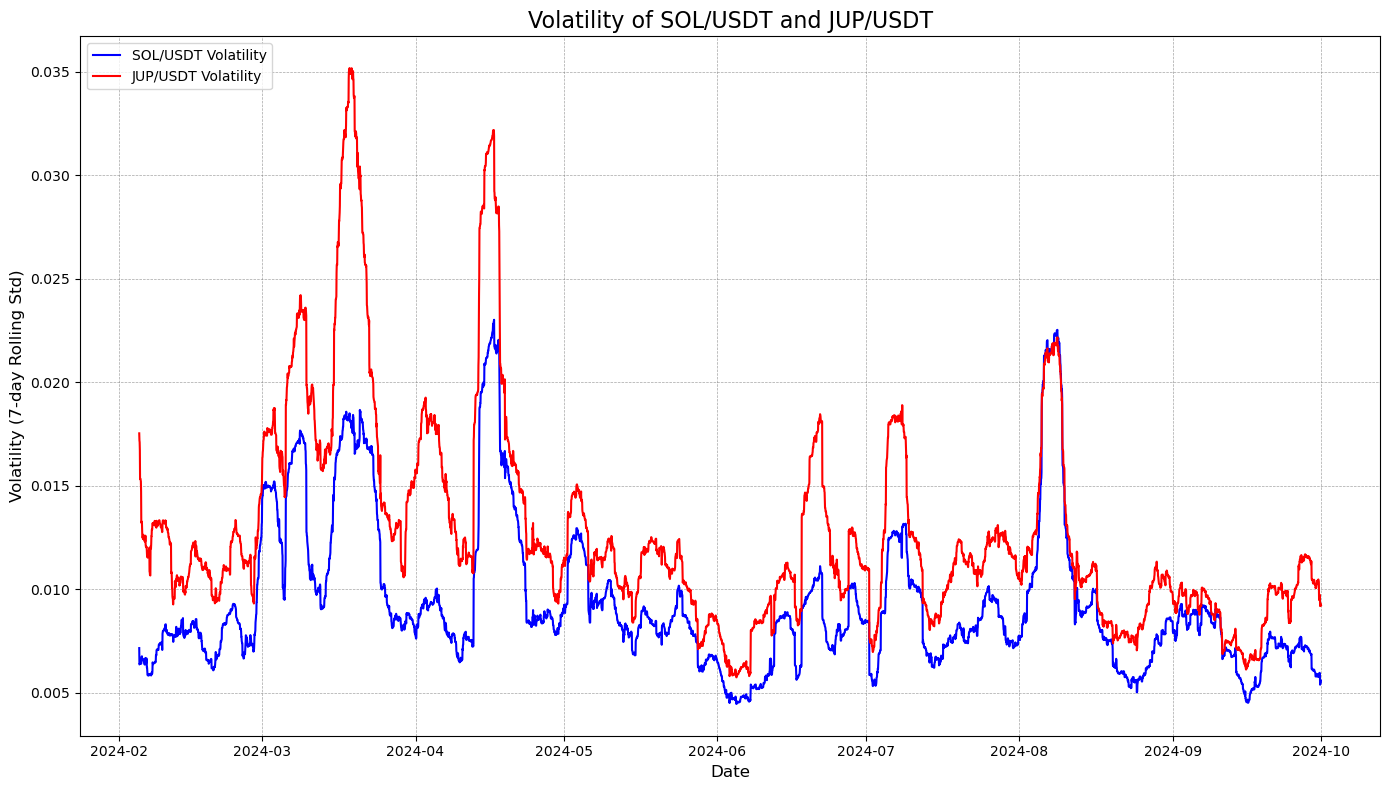

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 从 CSV 文件读取数据
data1 = pd.read_csv('SOL_USDT_data.csv', index_col='timestamp', parse_dates=True)
data2 = pd.read_csv('JUP_USDT_data.csv', index_col='timestamp', parse_dates=True)

# 计算百分比变化
data1['pct_change'] = data1['close'].pct_change()
data2['pct_change'] = data2['close'].pct_change()
win=100
# 计算波动率（使用滚动窗口的标准差，窗口期为7天）
data1['volatility'] = data1['pct_change'].rolling(window=win).std()
data2['volatility'] = data2['pct_change'].rolling(window=win).std()

# 计算平均波动率
mean_volatility_sol = data1['volatility'].mean()
mean_volatility_jup = data2['volatility'].mean()

# 打印平均波动率
print(f"Average Volatility of SOL/USDT: {mean_volatility_sol:.6f}")
print(f"Average Volatility of JUP/USDT: {mean_volatility_jup:.6f}")

# 绘制波动率对比
plt.figure(figsize=(14, 8))
plt.plot(data1.index, data1['volatility'], label='SOL/USDT Volatility', color='blue', linewidth=1.5)
plt.plot(data2.index, data2['volatility'], label='JUP/USDT Volatility', color='red', linewidth=1.5)

# 添加标题和标签
plt.title('Volatility of SOL/USDT and JUP/USDT', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (7-day Rolling Std)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()
